

# Topic Modeling (Latent Dirchlit Allocation)




In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# load the dataset
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# preprocess the data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.data)

# apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# print the top 3 words in each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_features = [feature_names[i] for i in topic.argsort()[:-4:-1]]
    print("Topic %d:" % (topic_idx))
    print(", ".join(top_features)) 


Topic 0:
use, windows, file
Topic 1:
key, encryption, chip
Topic 2:
ax, max, g9v
Topic 3:
think, don, game
Topic 4:
people, don, god
Topic 5:
25, 10, 17
Topic 6:
00, 10, 20
Topic 7:
like, car, just
Topic 8:
israel, jpeg, university
Topic 9:
edu, space, com


# Another Application

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [ ]:
!pip install polars 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# the model is based on counts 
from sklearn.decomposition import LatentDirichletAllocation



nltk.download('stopwords')
nltk.download('punkt')


df = pd.read_csv('bbc_text_cls.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
stops=stopwords.words('english')

In [ ]:
stops=stops+[
    'said','would','could','told','also','one','two','mr','new','year'
]

In [ ]:
def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stops]
    lemmatizer = WordNetLemmatizer()
    stemmed = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(stemmed)

In [ ]:
 df.head()

text,labels
str,str
"""Ad sales boost...","""business"""
"""Dollar gains o...","""business"""
"""Yukos unit buy...","""business"""
"""High fuel pric...","""business"""
"""Pernod takeove...","""business"""


In [ ]:
#df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
vectorizer=CountVectorizer(stop_words=stops)

In [ ]:
X=vectorizer.fit_transform(df['text'])
X.shape

(2225, 29270)

> n_components=10 specifies the number of topics to be generated. In this case, 10 topics will be generated.


> learning_method='online' specifies the online variational Bayes algorithm to be used for topic modeling.


In [ ]:
lda=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=0)

In [ ]:
lda.fit(X)

LatentDirichletAllocation(learning_method='online', random_state=0)

In [ ]:
def plot_top_words(model,feature_names,n_top_words=10):
  """
  Bar plot for each topic
  """
  fig,axes=plt.subplots(2,5,figsize=(30,15),sharex=True)
  axes=axes.flatten()
  for topic_idx,topic in enumerate(model.components_):
    top_features_ind=topic.argsort()[:-n_top_words-1:-1]
    top_features=[feature_names[i] for i in top_features_ind]
    weights=topic[top_features_ind]
    ax=axes[topic_idx]
    ax.barh(top_features,weights,height=0.7)
    ax.set_title(f"Topic {topic_idx+1} ",fontdict={'fontsize':30})
    ax.invert_yaxis()
    ax.tick_params(axis='both',which='major',labelsize=20)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    fig.suptitle('LDA',fontsize=40)

    fig.subplots_adjust(hspace=0.3)

  plt.subplots_adjust(top=0.9,bottom=0.05,wspace=0.9,hspace=0.3)
  plt.tight_layout()
  plt.show()
  



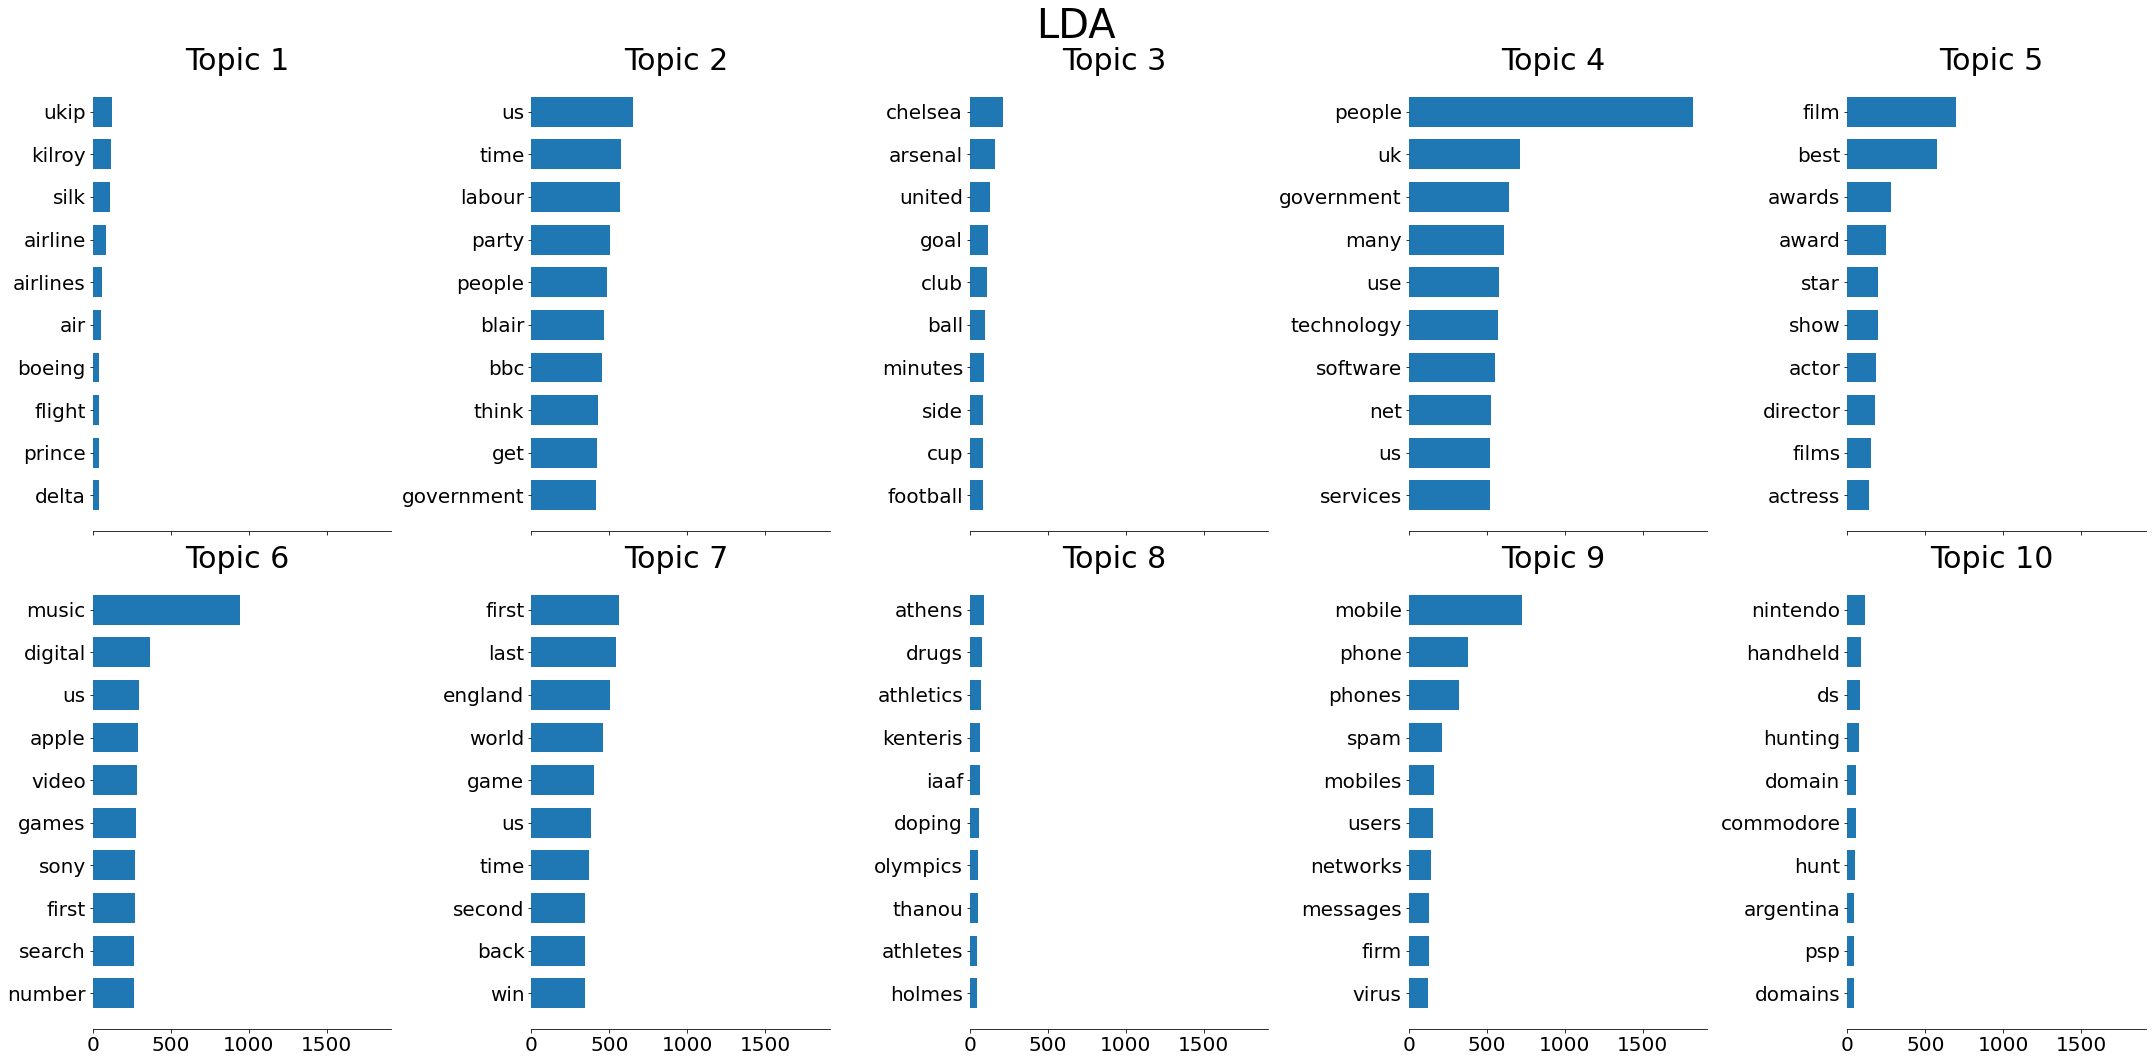

In [ ]:
feature_names=vectorizer.get_feature_names_out()
plot_top_words(lda,feature_names)
# topics by words matrix

In [ ]:
Z=lda.transform(X)
#  document by topic

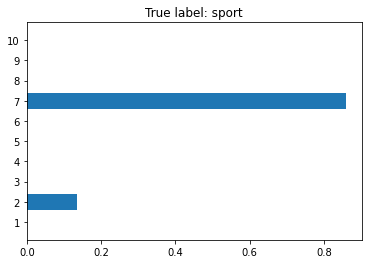

In [ ]:
np.random.seed(0)
i =np.random.choice(len(df))
z=Z[i]
topics=np.arange(10)+1

fig,ax=plt.subplots()
ax.barh(topics,z)
ax.set_yticks(topics)

#the true labe
ax.set_title(f"True label: {df.iloc[i]['labels']}") ;

In [ ]:
def wrap(x:str):
  return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)


print(wrap(df.iloc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g

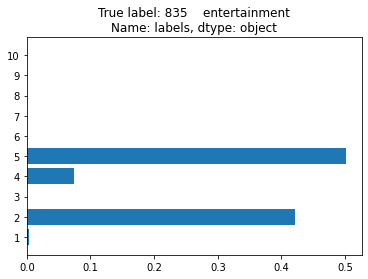

In [ ]:
i=np.random.choice(len(df))
z=Z[i]
fig,ax=plt.subplots()
ax.barh(topics,z)
ax.set_yticks(topics)
ax.set_title(f"True label: {df.iloc[[i], :]['labels']}") ;

In [ ]:
print(wrap(df.iloc[i]['text']))

# Dimensionality Reduction Using NMF

In [ ]:
import numpy as np
from sklearn.decomposition import NMF

# create a sample dataset with 10 features and 100 observations
X = np.random.rand(100, 10)

# perform NMF with 3 components
nmf = NMF(n_components=3)
X_reduced = nmf.fit_transform(X)

# print the original shape and reduced shape
print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)



In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# load the dataset
data = [
    "I love dogs and cats",
    "Dogs are better than cats",
    "The quick brown fox jumps over the lazy dog",
    "The brown fox is quick and the blue dog is lazy",
    "The sky is blue and the sun is bright",
    "I love to travel and explore new places",
    "Traveling broadens your mind",
    "The world is a beautiful place",
    "Life is short, make the most of it",
    "The purpose of life is to be happy"
]

# initialize the NMF transformer
nmf = NMF(
    n_components=2,
    beta_loss='kullback-leibler',
    solver='mu',
    random_state=0
    )

# initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# initialize the logistic regression classifier
clf = LogisticRegression()

# create the pipeline
pipeline = Pipeline([('vectorizer', vectorizer), ('nmf', nmf), ('clf', clf)])

# fit the pipeline to the data
pipeline.fit(data, [0, 1, 0, 0, 0, 2, 2, 2, 2, 2])

# predict the class of a new document
new_doc = ["Dogs and cats are the best"]
predicted_class = pipeline.predict(new_doc)
print(predicted_class)


[2]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# vectorize the text data
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['text'])

# fit NMF model
nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(X)

# print the top 10 words in each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))


Topic 0:
said government mr eu law secretary lord lords police home
Topic 1:
mr labour election blair brown party chancellor tax howard prime
Topic 2:
england wales ireland robinson rugby game france nations coach half
Topic 3:
film best awards award actor oscar actress festival films director
Topic 4:
growth economy economic sales year bank 2004 prices said rate
Topic 5:
yukos russian oil gazprom yugansk rosneft russia company court bankruptcy
Topic 6:
mobile music digital phone people technology phones video tv broadband
Topic 7:
champion world olympic open final seed win race indoor year
Topic 8:
chelsea club liverpool arsenal league united game mourinho gerrard cup
Topic 9:
software microsoft users virus search security spyware mail spam net
